# Inaugural Project

## 0. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

## 1. Illustrating the Edgeworth Box

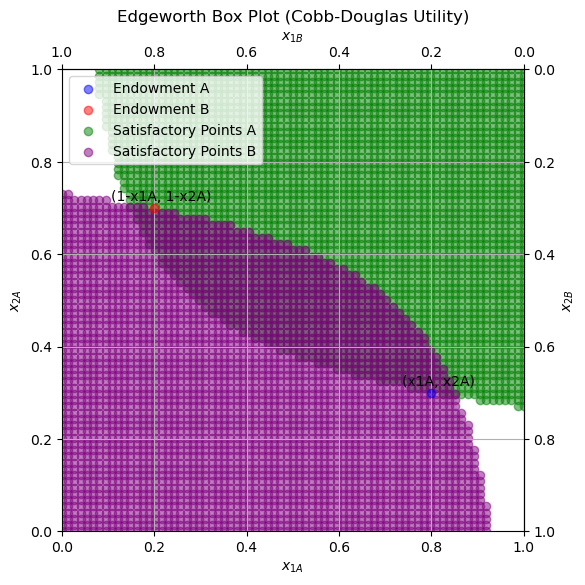

In [2]:
# Define Cobb-Douglas utility function
def cobb_douglas_utility(x1, x2, alpha):
    """
    Parameters:
        x1: Quantity of good 1.
        x2: Quantity of good 2.
        alpha: Exponent parameter.
    
    Returns:
        Utility value.
    """
    return x1**alpha * x2**(1 - alpha)

# Define alpha for Cobb-Douglas utility function (consumer A)
alpha = 1/3  # Utility function parameter for consumer A

# Define beta for Cobb-Douglas utility function (consumer B)
beta = 2/3  # Utility function parameter for consumer A

# Define endowments for both consumers (consumer A)
w1_A = 0.8  # Endowment of good 1 for consumer A
w2_A = 0.3  # Endowment of good 2 for consumer A
w1_B = 1-w1_A  # Endowment of good 1 for consumer B
w2_B = 1-w2_A  # Endowment of good 2 for consumer B

# Calculate the utility of the endowment for consumer A
utility_endowment_A = cobb_douglas_utility(w1_A, w2_A, alpha)

# Define number of points
num_points = 75

# Generate points for x1A and x2A
x1_values_A = np.linspace(0, 1, num_points)
x2_values_A = np.linspace(0, 1, num_points)

# Calculate utilities for each point in the grid for consumer A
utilities_A = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        utilities_A[i, j] = cobb_douglas_utility(x1_values_A[i], x2_values_A[j], alpha)

# Calculate x1B and x2B for consumer B
x1_values_B = 1 - x1_values_A
x2_values_B = 1 - x2_values_A

# Calculate utilities for each point in the grid for consumer B
utilities_B = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        utilities_B[i, j] = cobb_douglas_utility(x1_values_B[i], x2_values_B[j], beta)

# Plot utility curves for both consumers
fig, ax = plt.subplots(figsize=(8, 6))

# Endowment points
ax.scatter(w1_A, w2_A, color='blue', label='Endowment A', zorder=5, alpha=0.5)
ax.scatter(1-w1_A, 1-w2_A, color='red', label='Endowment B', zorder=5, alpha=0.5)  # Symmetric endowment for B

# Annotate endowment points and utility maxima
ax.annotate('(x1A, x2A)', (w1_A, w2_A), textcoords="offset points", xytext=(5,5), ha='center')
ax.annotate('(1-x1A, 1-x2A)', (1-w1_A, 1-w2_A), textcoords="offset points", xytext=(5,5), ha='center')

ax.set_xlabel('$x_{1A}$')
ax.set_ylabel('$x_{2A}$')
ax.set_title('Edgeworth Box Plot (Cobb-Douglas Utility)')
ax.legend()

# Add secondary x and y axis for consumer B
ax2 = ax.secondary_xaxis('top', functions=(lambda x: 1 - x, lambda x: 1 - x))
ax2.set_xlabel('$x_{1B}$')

ax3 = ax.secondary_yaxis('right', functions=(lambda y: 1 - y, lambda y: 1 - y))
ax3.set_ylabel('$x_{2B}$')

ax.grid(True)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')

# Plot the points where consumer A's utility is greater than or equal to the endowment
satisfactory_points_A = np.argwhere(utilities_A >= utility_endowment_A)
satisfactory_x1_values_A = x1_values_A[satisfactory_points_A[:, 0]]
satisfactory_x2_values_A = x2_values_A[satisfactory_points_A[:, 1]]
ax.scatter(satisfactory_x1_values_A, satisfactory_x2_values_A, color='green', label='Satisfactory Points A', alpha=0.5)

# Calculate the utility of the endowment for consumer B in transformed coordinates
utility_endowment_B = cobb_douglas_utility(1 - w1_A, 1 - w2_A, beta)

# Plot the points where consumer B's utility is greater than or equal to the endowment
satisfactory_points_B_x = 1 - satisfactory_x1_values_A
satisfactory_points_B_y = 1 - satisfactory_x2_values_A
ax.scatter(satisfactory_points_B_x, satisfactory_points_B_y, color='purple', label='Satisfactory Points B', alpha=0.5)

plt.legend()
plt.show()


## 2. Calculating the error in the market clearing condition

For p1 belonging to P = {0.5, 0.5+2*(1/N), ..., 2.5}






In [3]:
# Define the starting point and the number of elements
start = 0.5  # Starting point for the price vector
N = 75  # Number of elements in the price vector
alpha = 1/3  # Utility function parameter for consumer A
beta = 2/3  # Utility function parameter for consumer A

w1_A = 0.8  # Endowment of good 1 for consumer A
w2_A = 0.3  # Endowment of good 2 for consumer A
w1_B = 1 - w1_A  # Endowment of good 1 for consumer B
w2_B = 1 - w1_B  # Endowment of good 2 for consumer B

# Create the vector of prices for good 1 using a list comprehension
p1 = np.array([start + 2*i/N for i in range(0, N+1)])  # Prices for good 1
p2 = 1  # Price for good 2, set as a constant

# Define functions to calculate demand for each consumer
def x1_A(alpha, p1, p2, w1_A, w2_A):
    x1_A = alpha * ((p1 * w1_A + p2 * w2_A) / p1)  # Demand for good 1 by consumer A
    return x1_A

def x2_A(alpha, p1, p2, w1_A, w2_A):
    x2_A = (1 - alpha) * ((p1 * w1_A + p2 * w2_A) / p2)  # Demand for good 2 by consumer A
    return x2_A

def x1_B(beta, p1, p2, w1_B, w2_B):
    x1_B = beta * ((p1 * w1_B + p2 * w2_B) / p1)  # Demand for good 1 by consumer B
    return x1_B

def x2_B(beta, p1, p2, w1_B, w2_B):
    x2_B = (1 - beta) * ((p1 * w1_B + p2 * w2_B) / p2)  # Demand for good 2 by consumer B
    return x2_B

# Iterate through each price point
for i, price in enumerate(p1):
    # Calculate demands for goods by each consumer
    demand_A_1 = np.sum(x1_A(alpha, price, p2, w1_A, w2_A))  # Demand for good 1 by consumer A
    demand_A_2 = np.sum(x2_A(alpha, price, p2, w1_A, w2_A))  # Demand for good 2 by consumer A
    demand_B_1 = np.sum(x1_B(beta, price, p2, w1_B, w2_B))  # Demand for good 1 by consumer B
    demand_B_2 = np.sum(x2_B(beta, price, p2, w1_B, w2_B))  # Demand for good 2 by consumer B
    
    # Calculate market clearing errors for each good
    market_clearing_error_1 = demand_A_1 - w1_A + demand_B_1 - w1_B  # Market clearing error for good 1
    market_clearing_error_2 = demand_A_2 - w2_A + demand_B_2 - w2_B  # Market clearing error for good 2
    
    # Print results
    print(f"  At price                          {price:.2f}:")
    print(f"  Demand A for good 1:              {demand_A_1:.2f}")
    print(f"  Demand A for good 2:              {demand_A_2:.2f}")
    print(f"  Demand B for good 1:              {demand_B_1:.2f}")
    print(f"  Demand B for good 2:              {demand_B_2:.2f}")
    print(f"  Market Clearing Error for good 1: {market_clearing_error_1:.2f}")
    print(f"  Market Clearing Error for good 2: {market_clearing_error_2:.2f}")
    print()


  At price                          0.50:
  Demand A for good 1:              0.47
  Demand A for good 2:              0.47
  Demand B for good 1:              1.20
  Demand B for good 2:              0.30
  Market Clearing Error for good 1: 0.67
  Market Clearing Error for good 2: -0.33

  At price                          0.53:
  Demand A for good 1:              0.46
  Demand A for good 2:              0.48
  Demand B for good 1:              1.15
  Demand B for good 2:              0.30
  Market Clearing Error for good 1: 0.60
  Market Clearing Error for good 2: -0.32

  At price                          0.55:
  Demand A for good 1:              0.45
  Demand A for good 2:              0.50
  Demand B for good 1:              1.10
  Demand B for good 2:              0.30
  Market Clearing Error for good 1: 0.54
  Market Clearing Error for good 2: -0.30

  At price                          0.58:
  Demand A for good 1:              0.44
  Demand A for good 2:              0.51
  Dema

## 3. Calculating the market clearing price

Note: The total allocation of this code exceeds 1 for x2. We believe that this issue might derive from the demand functions and were not able to resolve this issue. We are happy to receive feedback on that matter!

In [16]:
# Define the starting point and the number of elements
start = 0.5  # Starting point for the price of good 1
N = 75       # Number of elements for the price vector
alpha = 1/3  # Share parameter for consumer A
beta = 2/3   # Share parameter for consumer B

# Define endowments for both consumers
w1_A = 0.8   # Endowment of good 1 for consumer A
w2_A = 0.3   # Endowment of good 2 for consumer A
w1_B = 1 - w1_A  # Endowment of good 1 for consumer B
w2_B = 1 - w1_B  # Endowment of good 2 for consumer B

# Create the vector for the price of good 1 using a list comprehension
p1 = np.array([start + 2*i/N for i in range(0, N+1)])  # Price vector for good 1
p2 = 1  # Price for good 2, set as the numeraire

# Define functions to calculate demand for each consumer
def x1_A(alpha, p1, p2, w1_A, w2_A):
    """
    Calculate the demand for good 1 by consumer A.
    """
    x1_A = alpha * ((p1 * w1_A + p2 * w2_A) / p1)
    return x1_A

def x2_A(alpha, p1, p2, w1_A, w2_A):
    """
    Calculate the demand for good 2 by consumer A.
    """
    x2_A = (1 - alpha) * ((p1 * w1_A + p2 * w2_A) / p2)
    return x2_A

def x1_B(beta, p1, p2, w1_B, w2_B):
    """
    Calculate the demand for good 1 by consumer B.
    """
    x1_B = beta * ((p1 * w1_B + p2 * w2_B) / p1)
    return x1_B

def x2_B(beta, p1, p2, w1_B, w2_B):
    """
    Calculate the demand for good 2 by consumer B.
    """
    x2_B = (1 - beta) * ((p1 * w1_B + p2 * w2_B) / p2)
    return x2_B

# Initialize variables for finding the price with market clearing error rounded to 0
closest_index = None
closest_error = float('inf')

# Iterate through each price point to find the closest index to the rounded market clearing error 0
for i, price in enumerate(p1):
    # Calculate demands for goods 1 and 2 by consumers A and B
    demand_A_1 = np.sum(x1_A(alpha, price, p2, w1_A, w2_A))
    demand_B_1 = np.sum(x1_B(beta, price, p2, w1_B, w2_B))
    
    # Calculate market clearing error for good 1
    market_clearing_error_1 = demand_A_1 - w1_A + demand_B_1 - w1_B
    
    # Round the market clearing error to two decimal places
    rounded_error_1 = abs(round(market_clearing_error_1, 2))
    
    # Check if the rounded error is 0
    if rounded_error_1 == 0:
        closest_index = i
        break

# Print the demand for each consumer at the price where the rounded market clearing error is 0
print("x1a, x2a, x1b, x2b for rounded market clearing error 0:")
price = p1[closest_index]
demand_A_1 = np.sum(x1_A(alpha, price, p2, w1_A, w2_A))
demand_A_2 = np.sum(x2_A(alpha, price, p2, w1_A, w2_A))
demand_B_1 = np.sum(x1_B(beta, price, p2, w1_B, w2_B))
demand_B_2 = np.sum(x2_B(beta, price, p2, w1_B, w2_B))

# Print the results
print(f"At price {price:.2f}:")
print(f"x1a: {demand_A_1:.2f}")
print(f"x2a: {demand_A_2:.2f}")
print(f"x1b: {demand_B_1:.2f}")
print(f"x2b: {demand_B_2:.2f}")


x1a, x2a, x1b, x2b for rounded market clearing error 0:
At price 1.06:
x1a: 0.36
x2a: 0.77
x1b: 0.64
x2b: 0.34


## 4a. Allocation for P1

Allocation if only prices in *P*

In [6]:
# Calibration parameters
alpha = 1/3  # Utility function parameter for consumer A
beta = 2/3  # Utility function parameter for consumer B
w1_A = 0.8  # Endowment of good 1 for consumer A
w2_A = 0.3  # Endowment of good 2 for consumer A
w1_B = 1 - w1_A  # Endowment of good 1 for consumer B
w2_B = 1 - w2_A  # Endowment of good 2 for consumer B

# Define the vector for the price of good 1
start = 0.5  # Starting point for the price of good 1
p2 = 1  # Price of good 2, set as the numeraire

# Define demand functions for consumer B
def demandB1(beta, p1, p2, w1_B, w2_B):
    return beta * (p1 * w1_B + p2 * w2_B) / p1  # Demand for good 1 by consumer B

def demandB2(beta, p1, p2, w1_B, w2_B):
    return (1 - beta) * (p1 * w1_B + p2 * w2_B) / p2  # Demand for good 2 by consumer B

# Define the Cobb-Douglas utility function for consumer A
def utility_A(x1_A, x2_A):
    return x1_A**alpha * x2_A**(1 - alpha)  # Utility function for consumer A

# Define the objective function to minimize (negative of utility)
def objective(p1):
    x1_A = 1 - demandB1(beta, p1, p2, w1_B, w2_B)  # Demand for good 1 by consumer A
    x2_A = 1 - demandB2(beta, p1, p2, w1_B, w2_B)  # Demand for good 2 by consumer A
    return -utility_A(x1_A, x2_A)  # Negative utility function to maximize

# Optimize the objective function with respect to p1
result = minimize_scalar(objective, bounds=(start, start + 2))  # Optimization to find the utility-maximizing price p1

# Extract the optimal price p1 that maximizes utility
optimal_price_p1 = result.x

# Calculate the optimal values of x1A and x2A using the utility-maximizing price p1
x1_A = 1 - demandB1(beta, optimal_price_p1, p2, w1_B, w2_B)  # Optimal demand for good 1 by consumer A
x2_A = 1 - demandB2(beta, optimal_price_p1, p2, w1_B, w2_B)  # Optimal demand for good 2 by consumer A
optimal_utility = utility_A(x1_A, x2_A)  # Utility achieved by consumer A at the optimal allocation

# Calculate demand for consumer B using the optimal price p1
optimal_x1_B = demandB1(beta, optimal_price_p1, p2, w1_B, w2_B)  # Optimal demand for good 1 by consumer B
optimal_x2_B = demandB2(beta, optimal_price_p1, p2, w1_B, w2_B)  # Optimal demand for good 2 by consumer B

# Print the utility-maximizing price p1 rounded to 2 decimals
print("Utility-maximizing price p1:", round(optimal_price_p1, 2))
print("Price of good 2 (p2):", p2)

# Print the optimal values of x1A and x2A rounded to 2 decimals
print("Optimal values of x1A and x2A using the utility-maximizing price p1:")
print("x1A:", round(x1_A, 2))
print("x2A:", round(x2_A, 2))
print("Optimal utility:", round(optimal_utility, 2))

# Print the optimal values of x1B and x2B rounded to 2 decimals
print("\nOptimal demand for consumer B:")
print("x1B:", round(optimal_x1_B, 2))
print("x2B:", round(optimal_x2_B, 2))


Utility-maximizing price p1: 1.9
Price of good 2 (p2): 1
Optimal values of x1A and x2A using the utility-maximizing price p1:
x1A: 0.62
x2A: 0.64
Optimal utility: 0.63

Optimal demand for consumer B:
x1B: 0.38
x2B: 0.36


## 4b. Allocation without price constraints

#note: We solve through gridsearch

In [7]:
# Calibration parameters
alpha = 1/3  # Parameter for consumer A in Cobb-Douglas utility function
beta = 2/3  # Parameter for consumer B in Cobb-Douglas utility function
w1_A = 0.8  # Endowment of good 1 for consumer A
w2_A = 0.3  # Endowment of good 2 for consumer A
w1_B = 1 - w1_A  # Endowment of good 1 for consumer B
w2_B = 1 - w2_A  # Endowment of good 2 for consumer B

p2 = 1  # Price of good 2, set as the numeraire

# Define demand functions for consumer B
def demandB1(beta, p1, p2, w1_B, w2_B):
    return beta * (p1 * w1_B + p2 * w2_B) / p1  # Demand for good 1 by consumer B

def demandB2(beta, p1, p2, w1_B, w2_B):
    return (1 - beta) * (p1 * w1_B + p2 * w2_B) / p2  # Demand for good 2 by consumer B

# Define Cobb-Douglas utility function for consumer A
def utility_A(x1_A, x2_A):
    return x1_A**alpha * x2_A**(1 - alpha)  # Utility function for consumer A

# Define Cobb-Douglas utility function for consumer B
def utility_B(x1_B, x2_B):
    return x1_B**beta * x2_B**(1 - beta)  # Utility function for consumer B

# Perform grid search for optimal p1
optimal_p1 = None  # Variable to store the optimal price of good 1
max_utility_A = -np.inf  # Initialize maximum utility for consumer A

for p1 in np.linspace(0.01, 50, 1000):
    # Calculate demand for consumer B
    x1_B = demandB1(beta, p1, p2, w1_B, w2_B)
    x2_B = demandB2(beta, p1, p2, w1_B, w2_B)
    
    # Calculate demand for consumer A
    x1_A = 1 - x1_B
    x2_A = 1 - x2_B
    
    # Clip demands to ensure they are within valid range (0, 1)
    x1_A = np.clip(x1_A, 1e-9, 1-1e-9)
    x2_A = np.clip(x2_A, 1e-9, 1-1e-9)
    
    # Calculate utility for consumer A
    utility_A_val = utility_A(x1_A, x2_A)
    
    # Update optimal_p1 and max_utility_A if utility_A_val is greater
    if utility_A_val > max_utility_A:
        max_utility_A = utility_A_val
        optimal_p1 = p1

# Calculate demand for consumer B using the optimal p1
optimal_x1_B = demandB1(beta, optimal_p1, p2, w1_B, w2_B)
optimal_x2_B = demandB2(beta, optimal_p1, p2, w1_B, w2_B)

# Calculate demand for consumer A using the optimal p1
optimal_x1_A = 1 - optimal_x1_B
optimal_x2_A = 1 - optimal_x2_B

# Clip demands to ensure they are within valid range (0, 1)
optimal_x1_A = np.clip(optimal_x1_A, 1e-9, 1-1e-9)
optimal_x2_A = np.clip(optimal_x2_A, 1e-9, 1-1e-9)

# Calculate utility for consumer B using the optimal demands
max_utility_B = utility_B(optimal_x1_B, optimal_x2_B)

# Print the results rounded to 2 decimal places
print("Optimal value of p1:", round(optimal_p1, 2))
print("Optimal demand for consumer B:")
print("x1_B:", round(optimal_x1_B, 2))
print("x2_B:", round(optimal_x2_B, 2))
print("Utility for consumer B:", round(max_utility_B, 2))
print("\nCorresponding demand for consumer A:")
print("x1_A:", round(optimal_x1_A, 2))
print("x2_A:", round(optimal_x2_A, 2))
print("Utility for consumer A:", round(max_utility_A, 2))


Optimal value of p1: 1.91
Optimal demand for consumer B:
x1_B: 0.38
x2_B: 0.36
Utility for consumer B: 0.37

Corresponding demand for consumer A:
x1_A: 0.62
x2_A: 0.64
Utility for consumer A: 0.63


## 5a. Allocation with choice set restricted to C

In [6]:
# Define Cobb-Douglas utility function
def cobb_douglas_utility(x1, x2, alpha):
    return x1**alpha * x2**(1 - alpha)

# Define alpha for Cobb-Douglas utility function (consumer A)
alpha = 1/3  # Adjust this parameter as needed

# Define beta for Cobb-Douglas utility function (consumer B)
beta = 2/3  # Adjust this parameter as needed

# Define endowments for both consumers (consumer A)
w1_A = 0.8
w2_A = 0.3
w1_B = 1 - w1_A
w2_B = 1 - w2_A

# Calculate the utility of the endowment for consumer A
utility_endowment_A = cobb_douglas_utility(w1_A, w2_A, alpha)

# Define number of points
num_points = 75

# Generate points for x1A and x2A
x1_values_A = np.linspace(0, 1, num_points)
x2_values_A = np.linspace(0, 1, num_points)

# Calculate utilities for each point in the grid for consumer A
utilities_A = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        utilities_A[i, j] = cobb_douglas_utility(x1_values_A[i], x2_values_A[j], alpha)

# Calculate x1B and x2B for consumer B
x1_values_B = 1 - x1_values_A
x2_values_B = 1 - x2_values_A

# Calculate utilities for each point in the grid for consumer B
utilities_B = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        utilities_B[i, j] = cobb_douglas_utility(x1_values_B[i], x2_values_B[j], beta)

# Initialize variables to store optimal allocation and utility for consumer A
optimal_x1_A = None
optimal_x2_A = None
max_utility_A = -np.inf  # Initialize with negative infinity

# Initialize variables to store optimal allocation and utility for consumer B
optimal_x1_B = None
optimal_x2_B = None
max_utility_B = -np.inf  # Initialize with negative infinity

# Iterate over the grid of possible allocations for consumer A
for i in range(num_points):
    for j in range(num_points):
        # Calculate utility for consumer A
        utility_A = utilities_A[i, j]
        
        # Calculate corresponding x1 and x2 for consumer B
        x1_B = 1 - x1_values_A[i]
        x2_B = 1 - x2_values_A[j]
        
        # Calculate utility for consumer B
        utility_B = cobb_douglas_utility(x1_B, x2_B, beta)
        
        # Check if utilities for both consumers are not lower than their initial endowments
        if utility_A >= utility_endowment_A and utility_B >= utility_endowment_B:
            # Update optimal allocation and utility for consumer A if utility is higher
            if utility_A > max_utility_A:
                max_utility_A = utility_A
                optimal_x1_A = x1_values_A[i]
                optimal_x2_A = x2_values_A[j]
                
                # Update optimal allocation for consumer B
                optimal_x1_B = x1_B
                optimal_x2_B = x2_B

# Print results for consumer A
print("Optimal allocation for consumer A:")
print("x1_A:", round(optimal_x1_A, 2))
print("x2_A:", round(optimal_x2_A, 2))
print("Maximum utility for consumer A:", round(max_utility_A, 2))

# Print results for consumer B
print("\nCorresponding allocation for consumer B (due to constraint x1B = 1 - x1A and x2B = 1 - x2A):")
print("x1_B:", round(optimal_x1_B, 2))
print("x2_B:", round(optimal_x2_B, 2))


Optimal allocation for consumer A:
x1_A: 0.58
x2_A: 0.84
Maximum utility for consumer A: 0.74

Corresponding allocation for consumer B (due to constraint x1B = 1 - x1A and x2B = 1 - x2A):
x1_B: 0.42
x2_B: 0.16


## 5b. Allocation without restrictions

We need to make maximize the utility of A given the budget constraint that the utility of B cannot be lower than the utility of their initial endowments.


In [ ]:
# Define alpha for Cobb-Douglas utility function (consumer A)
alpha = 1/3  # Adjust this parameter as needed

# Define beta for Cobb-Douglas utility function (consumer B)
beta = 2/3  # Adjust this parameter as needed

# Define endowments for both consumers (consumer A)
w1_A = 0.8
w2_A = 0.3
w1_B = 1 - w1_A
w2_B = 1 - w2_A

# Price of good 2 (set as the numeraire)
p2 = 1

# Calculate initial utility of consumer B with their initial endowment
initial_utility_B = w1_B**beta * w2_B**(1 - beta)

# Initialize variables to store optimal values
optimal_utility_A = -np.inf
optimal_x1A = None
optimal_x2A = None
optimal_utility_B = None
optimal_x1B = None
optimal_x2B = None

# Loop through different combinations of x1A and x2A
for x1A in np.linspace(0, 1, 101):
    for x2A in np.linspace(0, 1, 101):
        # Calculate corresponding values of x1B and x2B
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        # Calculate utility of consumer B
        utility_B = x1B**beta * x2B**(1 - beta)
        
        # Ensure utility of consumer B is not lower than initial endowment
        if utility_B < initial_utility_B:
            continue
        
        # Calculate utility of consumer A
        utility_A = x1A**alpha * x2A**(1 - alpha)
        
        # Update optimal values if utility of consumer A is higher
        if utility_A > optimal_utility_A:
            optimal_utility_A = utility_A
            optimal_x1A = x1A
            optimal_x2A = x2A
            optimal_utility_B = utility_B
            optimal_x1B = x1B
            optimal_x2B = x2B

# Print optimal values for both consumers rounded to 2 decimals
print("Optimal values for consumer A:")
print("Optimal x1A:", round(optimal_x1A, 2))
print("Optimal x2A:", round(optimal_x2A, 2))
print("Utility for consumer A:", round(optimal_utility_A, 2))

print("\nOptimal values for consumer B:")
print("Optimal x1B:", round(optimal_x1B, 2))
print("Optimal x2B:", round(optimal_x2B, 2))
print("Utility for consumer B:", round(optimal_utility_B, 2))

# Calculate the price of good 1 (p1) using the ratios of utilities and endowments
p1 = (w1_A * optimal_utility_A + w2_A * optimal_utility_A) / (w1_A * optimal_x1A + w2_A * optimal_x2A)

# Print the optimal price for good 1 (p1)
print("\nOptimal price for good 1 (p1):", round(p1, 2))


Optimal values for consumer A:
Optimal x1A: 0.58
Optimal x2A: 0.84
Utility for consumer A: 0.74

Optimal values for consumer B:
Optimal x1B: 0.42
Optimal x2B: 0.16
Utility for consumer B: 0.3

Optimal price for good 1 (p1): 1.14


## 6a. Allocation for maximized aggregate utility

In [ ]:
# Define alpha for Cobb-Douglas utility function (consumer A)
alpha = 1/3  # Adjust this parameter as needed

# Define beta for Cobb-Douglas utility function (consumer B)
beta = 2/3  # Adjust this parameter as needed

# Define endowments for both consumers (consumer A)
w1_A = 0.8
w2_A = 0.3
w1_B = 1 - w1_A
w2_B = 1 - w2_A

# Price of good 2 (set as the numeraire)
p2 = 1

# Calculate initial utility of consumer B with their initial endowment
initial_utility_B = w1_B**beta * w2_B**(1 - beta)

# Initialize variables to store optimal values
optimal_aggregate_utility = -np.inf
optimal_x1A = None
optimal_x2A = None
optimal_x1B = None
optimal_x2B = None
optimal_utility_A = None
optimal_utility_B = None

# Loop through different combinations of x1A and x2A
for x1A in np.linspace(0, 1, 101):
    for x2A in np.linspace(0, 1, 101):
        # Calculate corresponding values of x1B and x2B
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        # Ensure x1B and x2B are within [0, 1]
        if 0 <= x1B <= 1 and 0 <= x2B <= 1:
            # Calculate utility of consumer A
            utility_A = x1A**alpha * x2A**(1 - alpha)
            
            # Calculate utility of consumer B
            utility_B = x1B**beta * x2B**(1 - beta)
            
            # Calculate aggregate utility
            aggregate_utility = utility_A + utility_B
            
            # Update optimal values if aggregate utility is higher
            if aggregate_utility > optimal_aggregate_utility:
                optimal_aggregate_utility = aggregate_utility
                optimal_x1A = x1A
                optimal_x2A = x2A
                optimal_x1B = x1B
                optimal_x2B = x2B
                optimal_utility_A = utility_A
                optimal_utility_B = utility_B

# Calculate the price of good 1 (p1) using the ratio of utilities and endowments
p1 = (w1_A * optimal_utility_A + w2_A * optimal_utility_A) / (w1_A * optimal_x1A + w2_A * optimal_x2A)

# Print optimal values rounded to 2 decimals
print("Optimal values:")
print("Optimal x1A:", round(optimal_x1A, 2))
print("Optimal x2A:", round(optimal_x2A, 2))
print("Optimal x1B:", round(optimal_x1B, 2))
print("Optimal x2B:", round(optimal_x2B, 2))
print("Optimal utility for consumer A:", round(optimal_utility_A, 2))
print("Optimal utility for consumer B:", round(optimal_utility_B, 2))
print("Optimal aggregate utility:", round(optimal_aggregate_utility, 2))
print("Optimal price for good 1 (p1):", round(p1, 2))


Optimal values:
Optimal x1A: 0.33
Optimal x2A: 0.66
Optimal x1B: 0.67
Optimal x2B: 0.34
Optimal utility for consumer A: 0.52
Optimal utility for consumer B: 0.53
Optimal aggregate utility: 1.06
Optimal price for good 1 (p1): 1.25


## 6b. Illustration and discussion of results 3)-5)

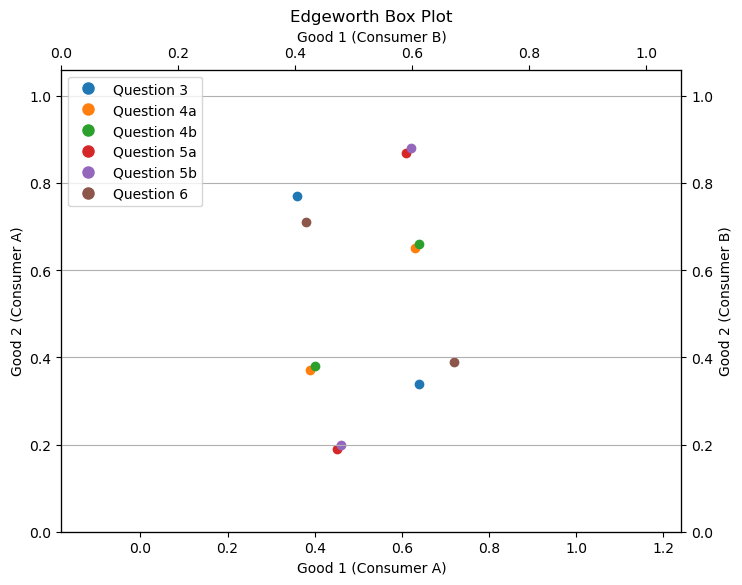

In [11]:
# Define the data
data = [
    [0.36, 0.77, 0.64, 0.34],
    [0.62, 0.64, 0.38, 0.36],
    [0.62, 0.64, 0.38, 0.36],
    [0.58, 0.84, 0.42, 0.16],
    [0.58, 0.84, 0.42, 0.16],
    [0.33, 0.66, 0.67, 0.34]
]

# Define custom labels for each row
row_labels = ['3', '4a', '4b', '5a', '5b', '6']

# Create a DataFrame with data and labels
df = pd.DataFrame(data, columns=['x1A', 'x2A', 'x1B', 'x2B'], index=row_labels)

# Plot the Edgeworth box
plt.figure(figsize=(8, 6))
handles = []  # To collect legend handles
colors = plt.cm.tab10.colors  # Using a colormap for distinct colors
offset = 0.01  # Offset value to prevent overlap
for i, (label, row) in enumerate(df.iterrows()):
    color = colors[i % len(colors)]  # Cycle through colors
    plt.plot(row['x1A'] + i * offset, row['x2A'] + i * offset, marker='o', linestyle='None', color=color, label=f'Question {label} (Consumer A)')
    plt.plot(row['x1B'] + i * offset, row['x2B'] + i * offset, marker='o', linestyle='None', color=color, label=f'Question {label} (Consumer B)')
    handles.append(plt.Line2D([], [], linestyle='None', marker='o', markersize=8, color=color, label=f'Question {label}'))

# Set labels and title
plt.xlabel('Good 1 (Consumer A)')
plt.ylabel('Good 2 (Consumer A)')
plt.title('Edgeworth Box Plot')

# Set limits for all four axes
plt.xlim(0, 1 + len(data) * offset)
plt.ylim(0, 1 + len(data) * offset)
plt.gca().set_aspect('equal', adjustable='box')

# Create secondary axes for Consumer B
ax1B = plt.twiny()
ax1B.set_xlim(plt.xlim())  # Set secondary x-axis limits to match primary x-axis
ax1B.set_xlabel('Good 1 (Consumer B)')
ax2B = plt.twinx()
ax2B.set_ylim(plt.ylim())  # Set secondary y-axis limits to match primary y-axis
ax2B.set_ylabel('Good 2 (Consumer B)')

# Set limits for secondary axes
ax1B.set_xlim(0, 1 + len(data) * offset)
ax2B.set_ylim(0, 1 + len(data) * offset)

# Create legend
plt.legend(handles=handles, loc='upper left')

# Show plot
plt.grid(True)
plt.show()


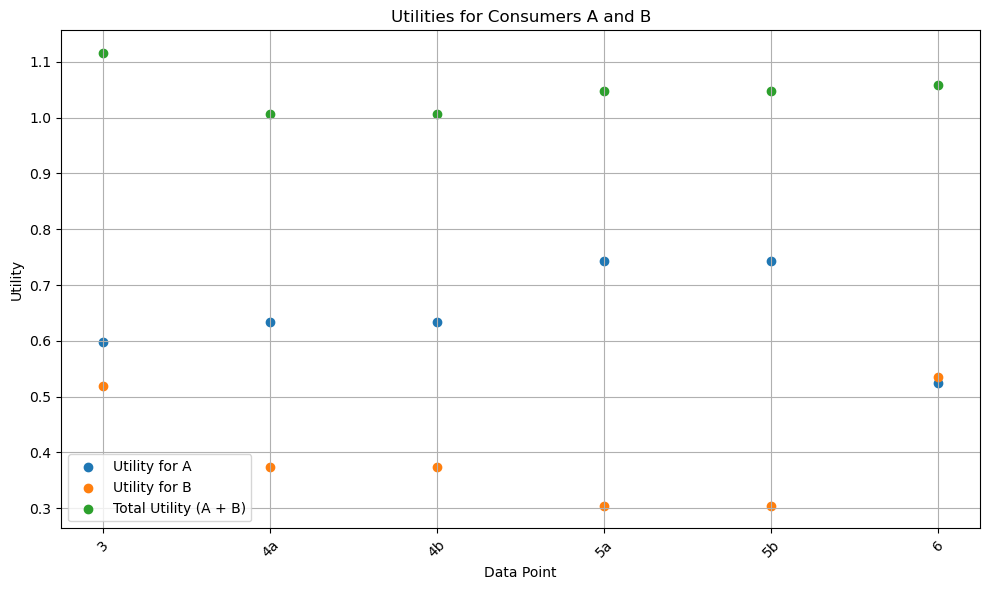

In [13]:
# Define Cobb-Douglas utility function for consumer A
def utility_A(x1_A, x2_A):
    return x1_A**alpha * x2_A**(1 - alpha)  # Utility function for consumer A

# Define Cobb-Douglas utility function for consumer B
def utility_B(x1_B, x2_B):
    return x1_B**beta * x2_B**(1 - beta)  # Utility function for consumer B

# Define alpha and beta parameters for the Cobb-Douglas utility functions
alpha = 1/3
beta = 2/3

data = [
    [0.36, 0.77, 0.64, 0.34],
    [0.62, 0.64, 0.38, 0.36],
    [0.62, 0.64, 0.38, 0.36],
    [0.58, 0.84, 0.42, 0.16],
    [0.58, 0.84, 0.42, 0.16],
    [0.33, 0.66, 0.67, 0.34]
]

# Define custom labels for each row
row_labels = ['3', '4a', '4b', '5a', '5b', '6']

# Create a DataFrame with data and labels
df = pd.DataFrame(data, columns=['x1A', 'x2A', 'x1B', 'x2B'], index=row_labels)

# Calculate utilities for each row
df['Utility_A'] = utility_A(df['x1A'], df['x2A'])
df['Utility_B'] = utility_B(df['x1B'], df['x2B'])
df['Total_Utility'] = df['Utility_A'] + df['Utility_B']

# Plot the utilities
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Utility_A'], label='Utility for A')
plt.scatter(df.index, df['Utility_B'], label='Utility for B')
plt.scatter(df.index, df['Total_Utility'], label='Total Utility (A + B)')
plt.xlabel('Data Point')
plt.ylabel('Utility')
plt.title('Utilities for Consumers A and B')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The edgeworth box above illustrates the respective allocations for the preceding tasks, which shows quite well how the results differ from each other. On top of that, the scatter plot displays the respective utilities for each scenario for both players A and B as well as the total utility (A+B). This makes it easy to infer which scenario benefits each player most and where the total utility is the highest. For scenario 3, where the market clearing price is selected by minimizing the market clearing error over a set of prices P1, total utility seems to be be the highest, scoring just over 1.1. This is beceause the total allocation of x2 exceeds the boundary of 1, which is an issue that we think might derive from the demand functions and that we could not resolve. For scenarios 4a and 4b, where A seeks to maximize utility either within the price set P1 or for any positive price, agent A is left much better of than agent B. This gap increases further in scenarios 5a and 5b, where A seeks to maximize utility by choosing consumption directly, but leaves B not worse off than initial endowment. Here the results seem similar for both the allocation where the choice set is restricted to C and where no further restrictions are imposed. In both cases of task 5, A scores the highest utility of all scenarios, reaching values of around 0.74. The utilitarian social planner in task 6a yields the best results in terms of total utility except for the erroneous result of task 3. Here, total utility adds up to 1.06.